# Connect to MySQL from Python

In [1]:
import mysql.connector
import pandas as pd

# Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",    # Change if needed
    user="root",         # Your MySQL username
    password="Jordant23!",  # Your MySQL password
    database="final_507" # Your database name
)

cursor = conn.cursor()

# Test connection
cursor.execute("SHOW TABLES;")
for table in cursor:
    print(table)

# Close the connection (for now)
cursor.close()
conn.close()


('encounters-by-facility_2012-2023_20240702',)
('er_income_summary',)
('Income_Inequality',)
('low-income_or_disadvantaged_communities_cleaned',)


## Load Data from MySQL into Pandas

In [3]:
# Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",    # Change if needed
    user="root",         # Your MySQL username
    password="Jordant23!",  # Your MySQL password
    database="final_507" # Your database name
)

cursor = conn.cursor()

# Test connection
cursor.execute("SHOW TABLES;")
for table in cursor:
    print(table)

# Query the cleaned table
query = "SELECT * FROM er_income_summary;"
df = pd.read_sql(query, conn)

# Close connection
conn.close()

# Preview Data
df.head()


('encounters-by-facility_2012-2023_20240702',)
('er_income_summary',)
('Income_Inequality',)
('low-income_or_disadvantaged_communities_cleaned',)


/var/folders/01/276kgpfd3vl01649sg75rmdr0000gn/T/ipykernel_1899/2347627411.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,county_name,total_visits,median_income
0,ALAMEDA,282280986.0,"$91,618"
1,AMADOR,273919.0,No Data
2,BUTTE,2690154.0,"$37,557"
3,CALAVERAS,132820.0,No Data
4,COLUSA,62945.0,No Data


## Data Exploration

In [5]:
df.info()  # Check data types and missing values
df.describe()  # Summary statistics


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   county_name    55 non-null     object 
 1   total_visits   55 non-null     float64
 2   median_income  55 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.4+ KB


,total_visits
count,5.500000e+01
mean,9.321164e+08
std,6.117774e+09
min,5.423700e+04
25%,3.208355e+05
50%,2.460236e+06
75%,6.349126e+07
max,4.544168e+10


In [7]:
df.isnull().sum()


county_name      0
total_visits     0
median_income    0
dtype: int64

# Distribution of ER Visits by County

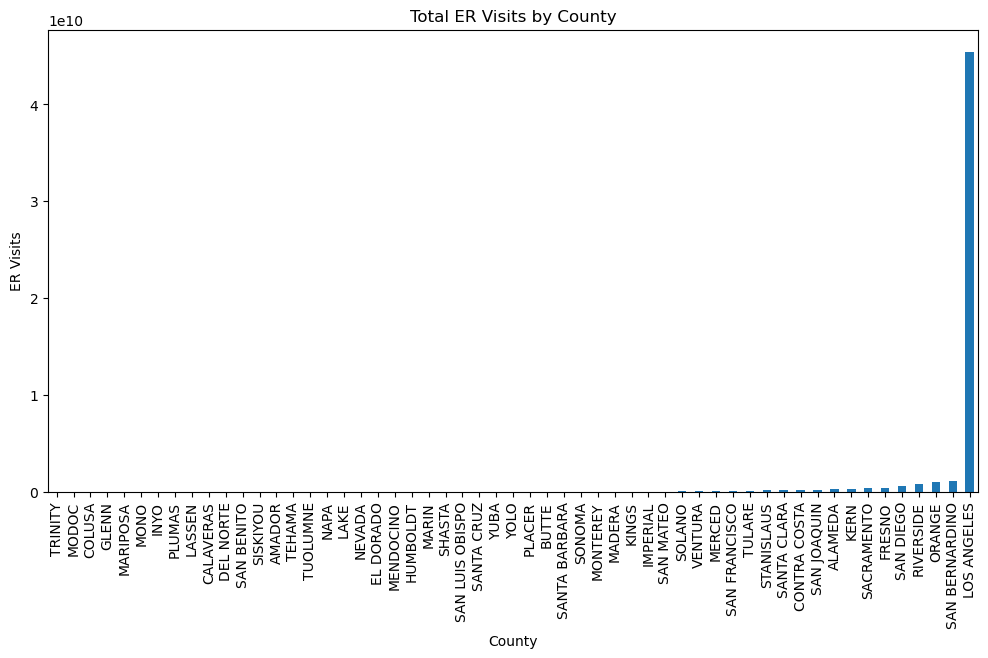

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df.groupby("county_name")["total_visits"].sum().sort_values().plot(kind="bar")
plt.title("Total ER Visits by County")
plt.xlabel("County")
plt.ylabel("ER Visits")
plt.xticks(rotation=90)
plt.show()


## As we can see LA is such a large county we cant gain any more information from the other counties

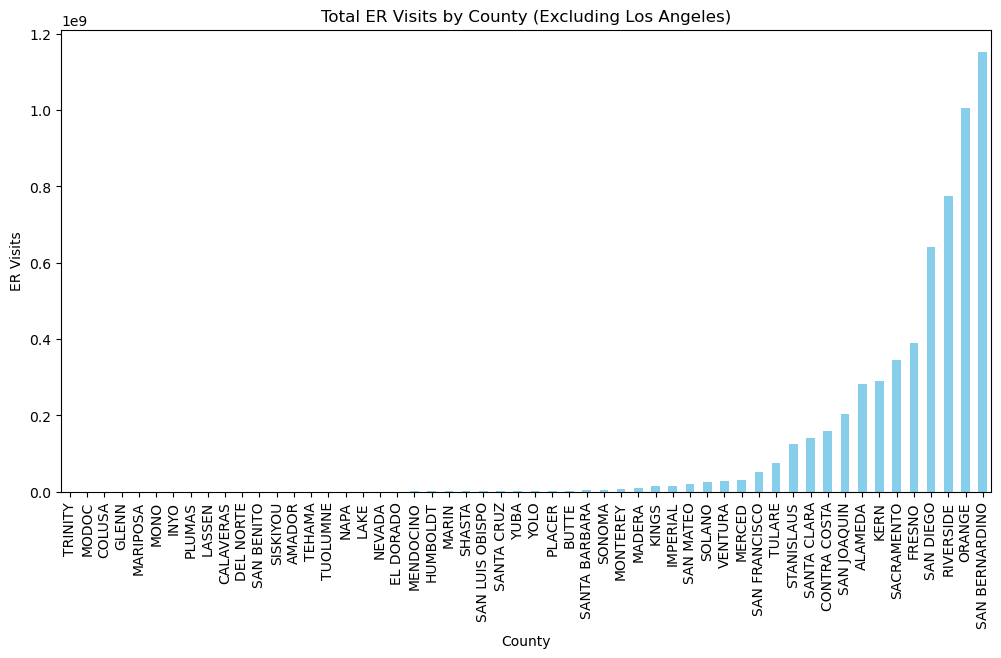

In [15]:
# Exclude Los Angeles
df_excl_la = df[df['county_name'] != 'LOS ANGELES']

# Plot
plt.figure(figsize=(12, 6))
df_excl_la.groupby("county_name")["total_visits"].sum().sort_values().plot(kind="bar", color='skyblue')
plt.title("Total ER Visits by County (Excluding Los Angeles)")
plt.xlabel("County")
plt.ylabel("ER Visits")
plt.xticks(rotation=90)
plt.show()


## This bar chart displays the total number of ER visits by county, excluding Los Angeles County, which was previously dominating the data.

- San Bernardino, Riverside, and San Diego have the highest total ER visits among the remaining counties.
- Sacramento, Fresno, and Alameda also show significant ER visit counts but are lower than the top three.
- Smaller or more rural counties (e.g., Trinity, Modoc, Colusa, and Glenn) have relatively low ER visit totals.
- The distribution is highly skewed, with a few counties having significantly more ER visits than others.

From our combined dataset we are also missing some counties, this is seen above.

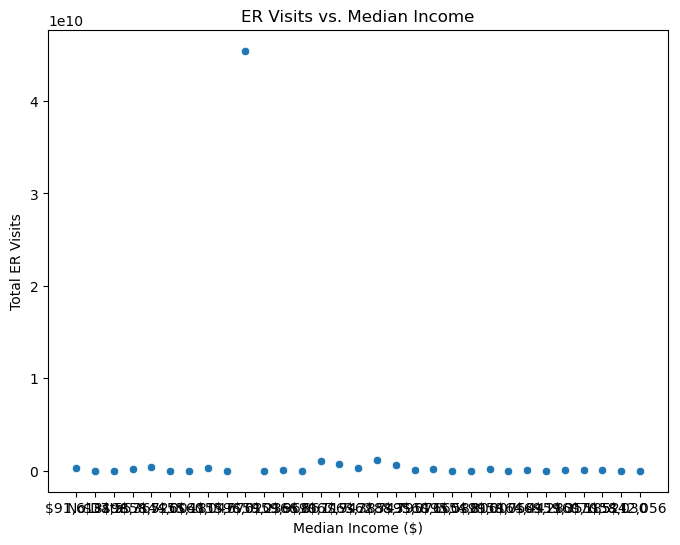

In [24]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="median_income", y="total_visits")
plt.title("ER Visits vs. Median Income")
plt.xlabel("Median Income ($)")
plt.ylabel("Total ER Visits")
plt.show()


Making the map easier to see and read

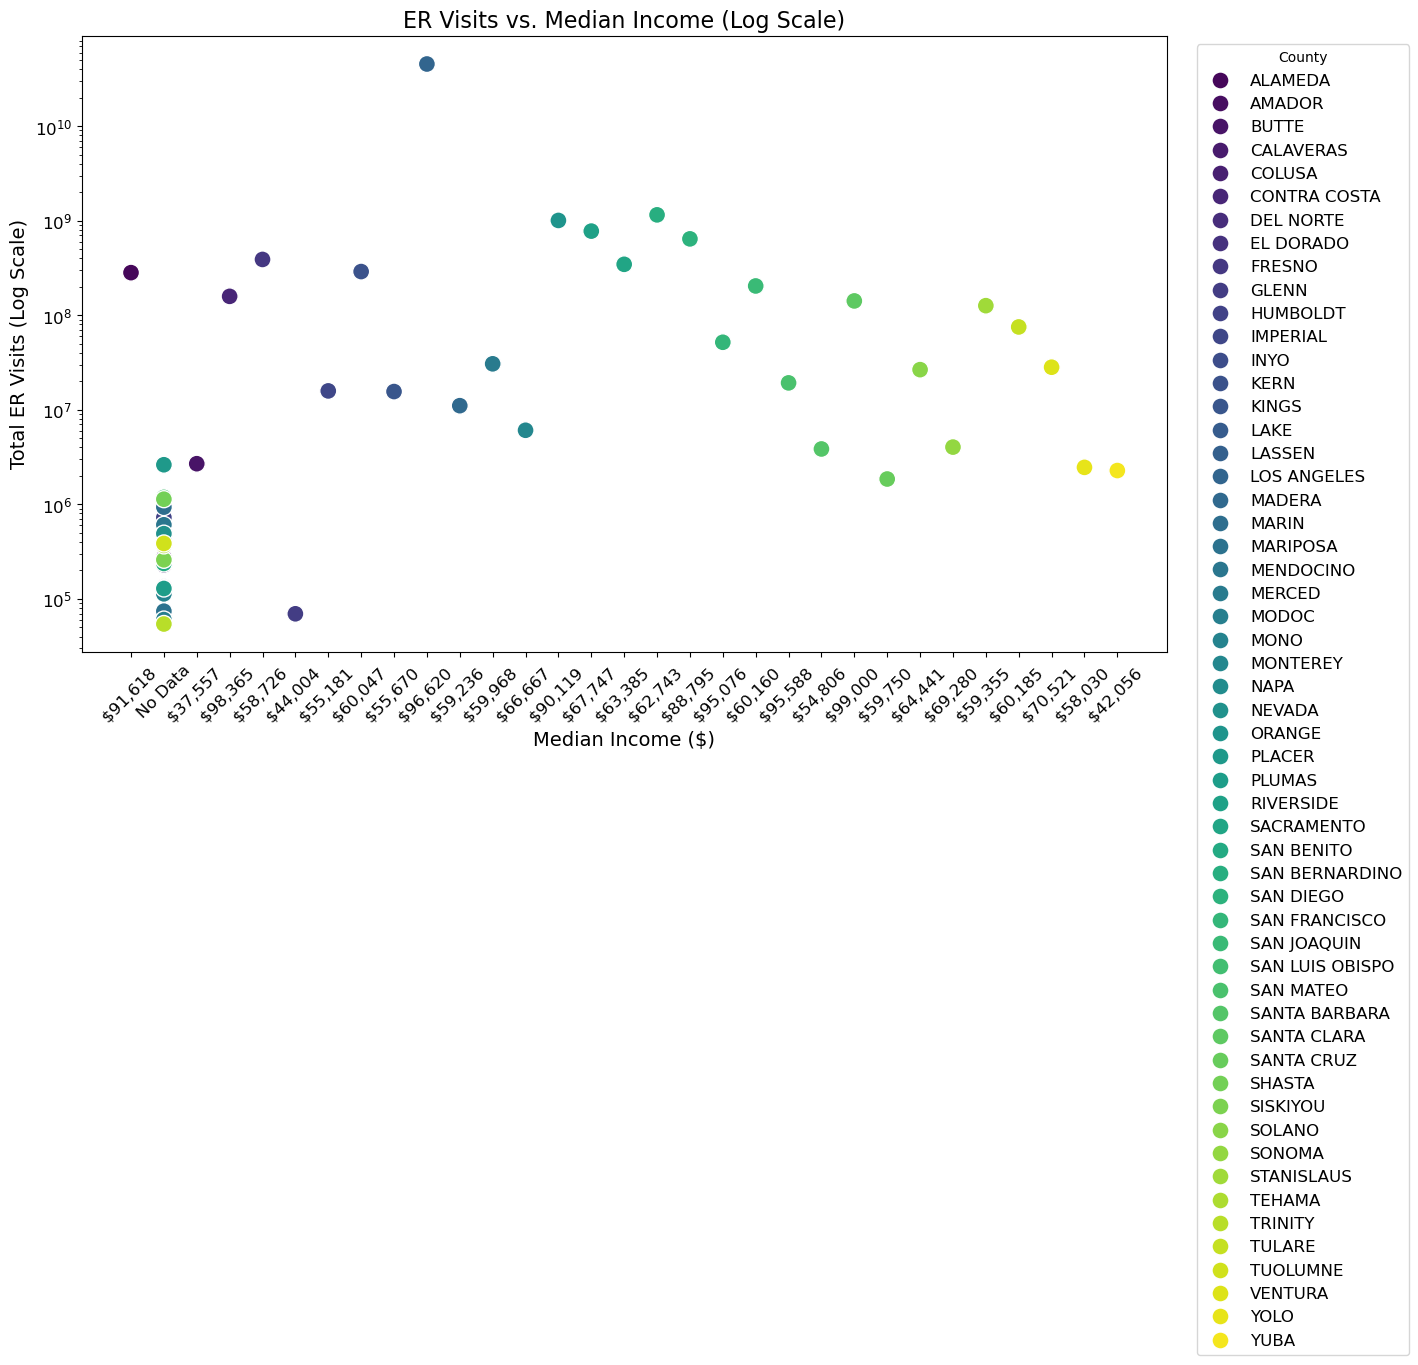

In [26]:
# Plot with increased figure size
plt.figure(figsize=(14, 8))  # Increase width and height
sns.scatterplot(data=df, x="median_income", y="total_visits", hue="county_name", palette="viridis", s=150)

# Set log scale for y-axis
plt.yscale('log')

# Improve title and labels
plt.title("ER Visits vs. Median Income (Log Scale)", fontsize=16)
plt.xlabel("Median Income ($)", fontsize=14)
plt.ylabel("Total ER Visits (Log Scale)", fontsize=14)

# Improve legend positioning and size
plt.legend(title='County', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=12)

# Adjust tick labels for better spacing
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

plt.show()


## This scatter plot visualizes the relationship between Median Income ($) and Total ER Visits, using a log scale for ER Visits to better display the distribution. 

### Next, I will organize the median income from lowest to highest.

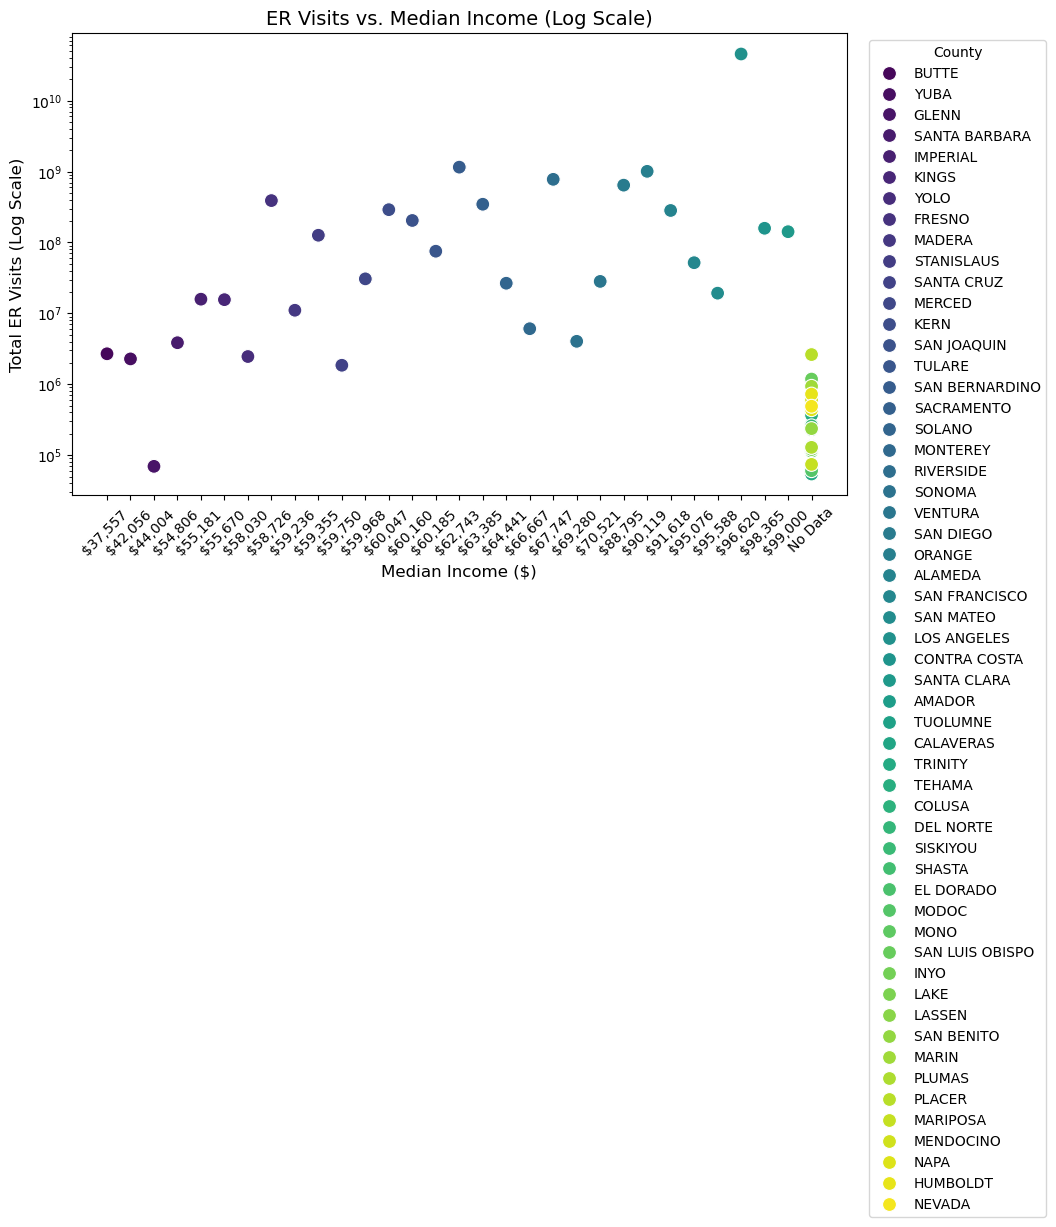

In [34]:
# Sort DataFrame by median income in ascending order
df_sorted = df.sort_values(by="median_income", ascending=True)

# Re-plot with sorted data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sorted, x="median_income", y="total_visits", hue="county_name", palette="viridis", s=100)
plt.yscale('log')  # Log scale for better visibility
plt.title("ER Visits vs. Median Income (Log Scale)", fontsize=14)
plt.xlabel("Median Income ($)", fontsize=12)
plt.ylabel("Total ER Visits (Log Scale)", fontsize=12)
plt.legend(title='County', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=10)
plt.xticks(fontsize=10, rotation=45)  # Rotate for readability
plt.yticks(fontsize=10)
plt.show()


### When looking at this graph, we can see that lower incomes have less often ER visits as compared to people who are making more. There's also a lot of data that isn't seen, which is showcasing the bottom right with the no data column.